In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scienceplots

In [38]:
class DATA():
    def __init__(self):
        self.time = 0
        self.event = 0
        
def getData(det, file):
    df = pd.read_csv(file, delimiter=',', header=0)
    df = df.set_axis(['event','time'], axis = 1)
    det.event = df['event'].to_numpy(dtype=float)
    det.time = df['time'].to_numpy(dtype=float)

In [39]:
PDS = DATA()
CRT = DATA()

getData(PDS, "PDS_TriggerTimesFull.txt")
getData(CRT, "CRT_TriggerTimesFull.txt")

CRT.event[True] = 0.5
PDS.event[True] = 0.5


In [40]:
maxtime = 20
binsmult = 10
H = [0]*3
yedges = [0]*3
xedges = [0]*3
H[0], yedges[0], xedges[0] = np.histogram2d(PDS.event, PDS.time, bins=(1,maxtime*binsmult), range = [[0,1],[0,maxtime]])
H[1], yedges[1], xedges[1] = np.histogram2d(CRT.event, CRT.time, bins=(1,maxtime*binsmult), range = [[0,1],[0,maxtime]])
H[2], yedges[2], xedges[2] = np.histogram2d(CRT.event, CRT.time, bins=(1,maxtime*binsmult), range = [[0,1],[0,maxtime]])

H[0][H[0]==0] = np.nan
H[1][H[1]==0] = np.nan

H[2] = H[0]+H[1]
H[2][H[2]>=2] = 1
#print(np.sum(H[2]))
H[2][H[2]==0] = np.nan


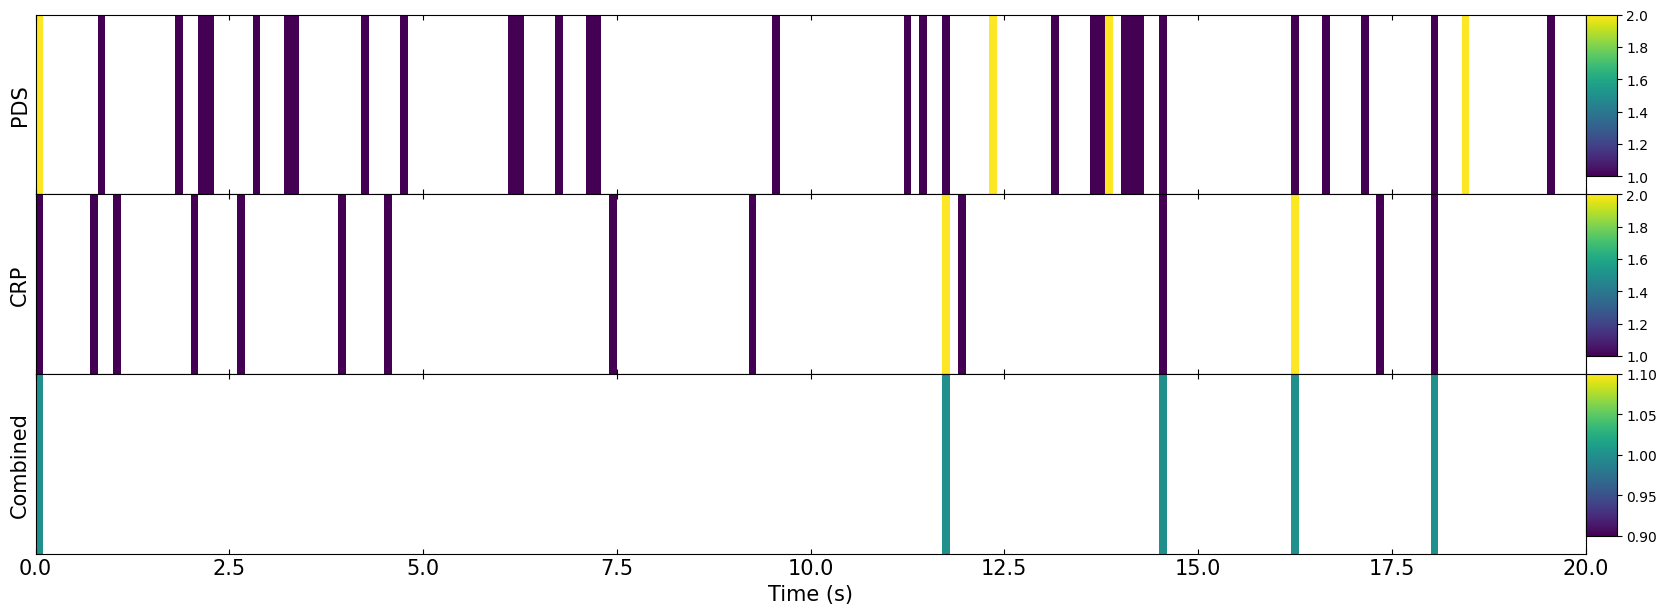

In [41]:
#plt.style.use(['science', 'notebook'])
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(20,7))
fig.subplots_adjust(hspace=0)

descript = ["PDS", "CRP", "Combined"]
for i, ax in enumerate(axs):
    X, Y = np.meshgrid(xedges[i], yedges[i])
    pcm = ax.pcolormesh(X, Y, H[i])
    ax.tick_params(left=False, right=False, top=True, direction='in', labelleft=False, labelsize=15)
    ax.set_ylabel(descript[i], fontsize=15)
    axs[2].set_xlabel("Time (s)", fontsize=15)
    cax = ax.inset_axes([1.0,0.1,0.02,0.9])
    plt.colorbar(pcm, ax = ax, cax = cax)

plt.savefig("time_display.png", bbox_inches='tight')

In [42]:
PDS = DATA()

getData(PDS, "PDS_TriggerTimesFull.txt")
PDS.event[True] = 0.5
#print(PDS.time)
maxtime = 100
binsmult = 10
H = [0]*3
yedges = [0]*3
xedges = [0]*3
for i in range(0,4):
    reftime = PDS.time[1]
    PDS.time = np.delete(PDS.time, 0)
    PDS.event = np.delete(PDS.event, 0)
    PDS.time = PDS.time-reftime
    #print(PDS.time)
    #print(reftime)
    H[0], yedges[0], xedges[0] = np.histogram2d(PDS.event, PDS.time, bins=(1,maxtime*binsmult), range = [[0,1],[-0.01,maxtime]])
    H[1], yedges[1], xedges[1] = np.histogram2d(CRT.event, CRT.time, bins=(1,maxtime*binsmult), range = [[0,1],[-0.01,maxtime]])
    H[2], yedges[2], xedges[2] = np.histogram2d(CRT.event, CRT.time, bins=(1,maxtime*binsmult), range = [[0,1],[-0.01,maxtime]])

    for j, (hpds, hcrt) in enumerate(zip(H[0][0],H[1][0])):
        if hcrt != 0 and hpds != 0:
            H[2][0][j] = (hcrt+hpds)//2
        else:
            H[2][0][j] = np.nan
    H[0][H[0]==0] = np.nan
    H[1][H[1]==0] = np.nan

print(f'{i} {np.nansum(H[2])}')
print(f'{i} {np.nansum(H[1])}')
print(f'{np.nansum(H[2])/np.nansum(H[1])}')

3 66.0
3 72.0
0.9166666666666666


[28.28604 29.50214 29.64554 29.90234 29.95534 30.55544 30.66374 31.19664
 31.51514 32.04874 33.24794 33.56584 33.61924 33.80524 35.68744 36.42294
 36.47764 37.21554 37.32864 37.35794 37.52204 38.04674 39.85654 40.35084
 40.38514]
[73.432297 73.912167 75.88249  78.013867 78.163805 79.189065 81.57607
 83.830889 83.977804 85.625732]


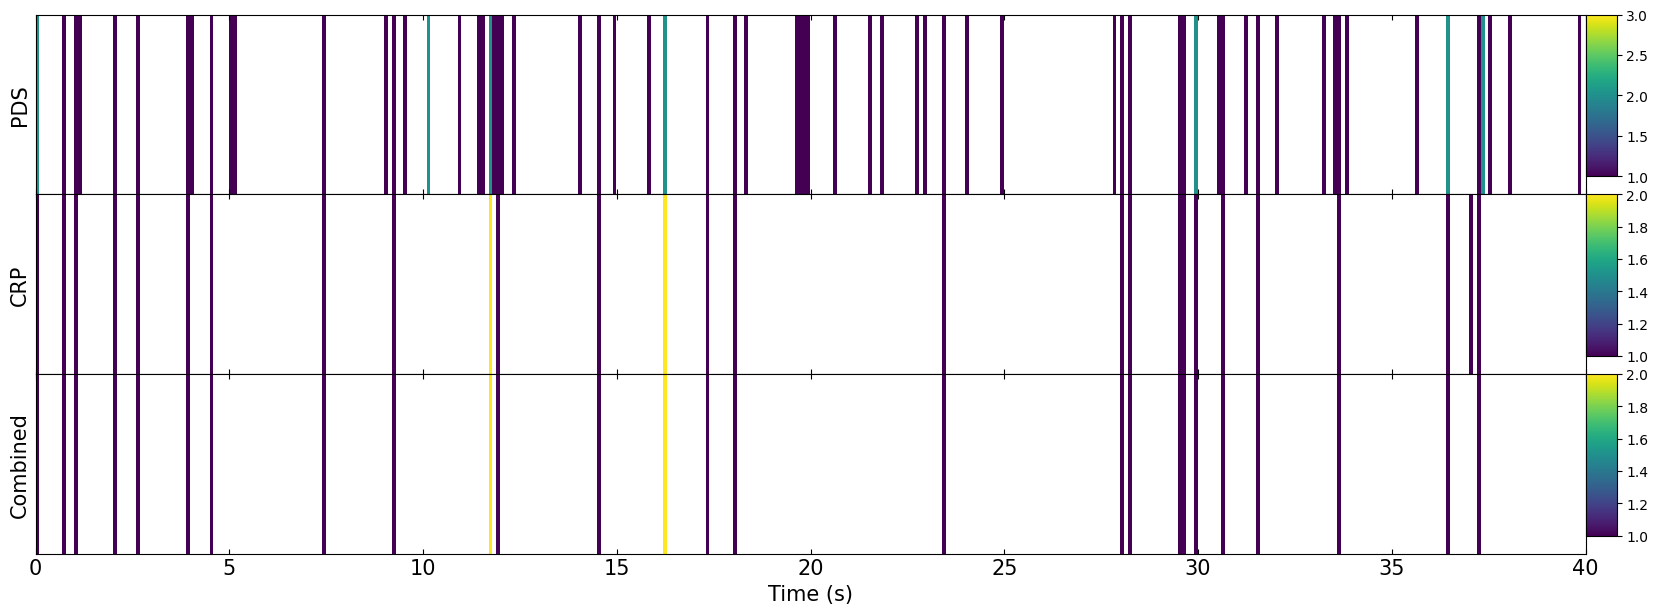

In [43]:
 
#plt.style.use(['science', 'notebook'])
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(20,7))
fig.subplots_adjust(hspace=0)
# descript = ["PDS", "CRT", "Combined"]
for i, ax in enumerate(axs):
    X, Y = np.meshgrid(xedges[i], yedges[i])
    pcm = ax.pcolormesh(X, Y, H[i])
    ax.tick_params(left=False, right=False, top=True, direction='in', labelleft=False, labelsize=15)
    ax.set_ylabel(descript[i], fontsize=15)
    axs[2].set_xlabel("Time (s)", fontsize=15)
    cax = ax.inset_axes([1.0,0.1,0.02,0.9])
    plt.colorbar(pcm, ax = ax, cax = cax)
    plt.savefig("time_display_full_shifted.png", bbox_inches='tight')
    a = 0
    plt.xlim(a,a+40)


print(PDS.time[50:75])
print(CRT.time[50:60])


In [44]:
arrayidx = np.where((X[0]>0) & (X[0]<130))
print(np.nansum(H[2][0][arrayidx[0][0]:arrayidx[0][-1]]))

65.0
